In [38]:
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
# Import path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

In [20]:
from config import *

In [21]:
csv_file = data_meta / "all_info.csv"

# Read dataframe containing images information
df = pd.read_csv(csv_file)

In [22]:
df.Location = df.Location.astype(str)

In [23]:
module_path = str(Path.cwd().parents[0] / "src")

if module_path not in sys.path:
    sys.path.append(module_path)
    
import utils as utils

# Read masks image and corresponding intensity measurement

In [24]:
# Read mask image
masks = utils.get_masks(data_mask)

# Create image based on intensity level of expression 

In [25]:
df_intensity = pd.read_csv(data_meta / 'measurements_intensity.csv')
df_morph = pd.read_csv(data_meta / 'measurements_morphology.csv')
markers = df_intensity.Marker.unique()

In [26]:
# Calculate total intensity from mena intensity and area size
for row in df_intensity.itertuples():
    cond = row.Location
    i = row.Id
    total_nuclei_intensity = row.Nuclei_mean_intensity * \
        df_morph[(df_morph.Location == cond) & (
            df_morph.Id == i)]['Nuclei_area'].item()
    total_cyto_intensity = row.Cyto_mean_intensity * \
        df_morph[(df_morph.Location == cond) & (
            df_morph.Id == i)]['Cyto_area'].item()
    df_intensity.loc[row.Index,
                     'Nuclei_total_intensity'] = total_nuclei_intensity
    df_intensity.loc[row.Index, 'Cyto_total_intensity'] = total_cyto_intensity

We have {{len(markers)}} markers (no including DAPI and cell segmentation markers) 

# Vizualisation

In [348]:
def get_data_per_condition(df_intensity, scaler, condition=None):
    # Read information 
    df = df_intensity.iloc[:,3:]
    if condition:
        df_subset = df[df.Location == condition]
        df_subset.drop(['Location'], axis=1, inplace=True)
    else:
        df_subset = df.iloc[:,-2:]
        df_subset['Marker'] = df.Marker
        df_subset['Id'] = df.Location.astype(str) + '_' + df.Id.astype(str)
    df_subset.rename(columns={'Nuclei_total_intensity':'Nuclei', 'Cyto_total_intensity': 'Cyto'}, inplace=True)

    # Pivot the dataframe
    df_per_cell = df_subset.pivot(index= 'Id', columns = ['Marker'], values = ['Nuclei', 'Cyto'])
    
    # Scale the data
    x_scaled = scaler.fit_transform(df_per_cell)
    df_per_cell_scaled = pd.DataFrame(x_scaled, index = df_per_cell.index, columns=df_per_cell.columns)
    
    return df_per_cell_scaled

## Per FOV

In [349]:
condition = 3 # Select the condition

# scaler = MinMaxScaler()
# my_cmap = 'viridis'
# scale_name = 'Relative Intensity' 

scaler = StandardScaler()
my_cmap = 'bwr'
scale_name = 'Z-score'

df_per_cell_scaled = get_data_per_condition(df_intensity, scaler, condition=condition)
df_per_cell_scaled.head()

C:\Users\thu71\.conda\envs\work\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\thu71\.conda\envs\work\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Nuclei                                                              \
Marker       AKT       APC     AXIN1 Cyclin D1  Cyclin E      DKK1      DKK2   
Id                                                                             
3      -0.835972 -0.567171 -1.312402 -0.866739 -0.909535 -0.381641 -0.969483   
4      -1.221061 -0.364226 -1.500151 -0.119189 -0.976399  0.328234 -0.953352   
5      -0.749871 -0.717051 -1.098834 -0.441496 -0.830554 -0.690299 -0.880233   
6      -0.467685  0.217670 -0.798357  0.003596 -0.270307 -0.384646 -0.402069   
8       2.632757  4.082294  2.369030  4.098780  2.689410  3.948050  2.533727   

                                                  ...      Cyto            \
Marker   EMMPRIN Non-phospho-B-catenin    RNF 43  ...      DKK1      DKK2   
Id                                                ...                       
3      -1.019705             -0.848543 -0.398681  ... -0.536627 -0.844292   
4      -1.001246             -0.694027  0.188946  ... -0.463656 -1.004377   
5      -0.855578             -0.844906 -0.738185  ... -0.355723 -0.394442   
6      -0.198448             -0.451147 -0.598059  ... -0.539715 -0.517257   
8       3.873702              2.365627  4.185280  ...  3.706001  1.620058   

                                                                      \
Marker   EMMPRIN Non-phospho-B-catenin    RNF 43      Wnt1      mTOR   
Id                                                                     
3      -0.779744             -0.717968 -0.558445 -0.596185 -0.546216   
4      -0.994152             -0.989697 -0.537013 -0.496835 -0.506181   
5      -0.580819             -0.038298 -0.402947 -0.364773 -0.411382   
6      -0.566187             -0.584332 -0.620811 -0.742968 -0.609204   
8       3.274625              1.641506  3.717716  3.604448  3.720269   

                                              
Marker     p-AKT    p-mTOR phospho-B-catenin  
Id                                            
3      -0.800828 -0.720412         -0.804162  
4      -0.937266 -0.813475         -0.940789  
5      -0.396986 -0.411858         -0.467799  
6      -0.568843 -0.600879         -0.685092  
8       1.513408  2.398896          2.524161  

[5 rows x 30 columns]

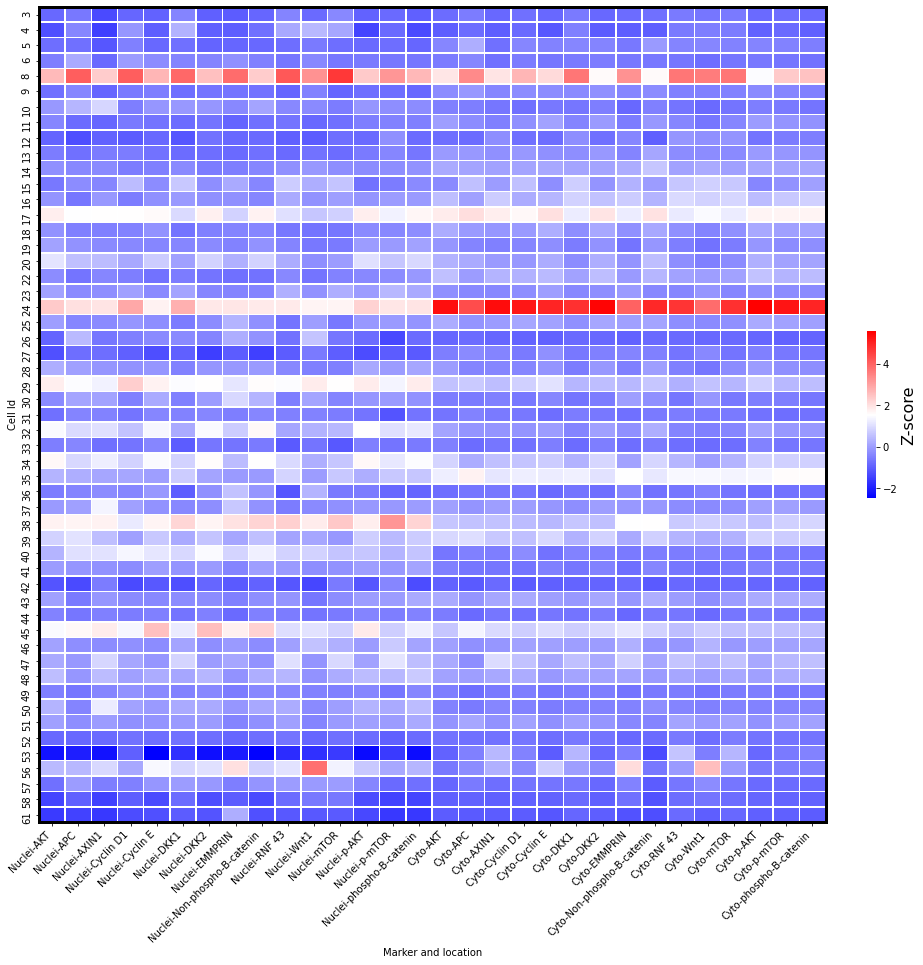

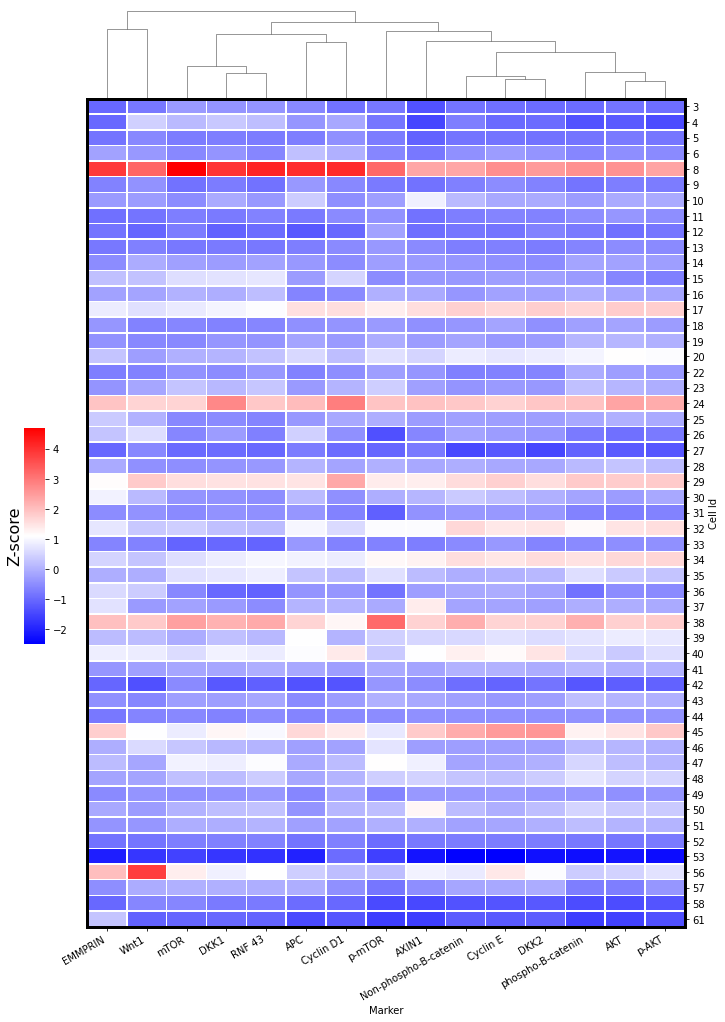

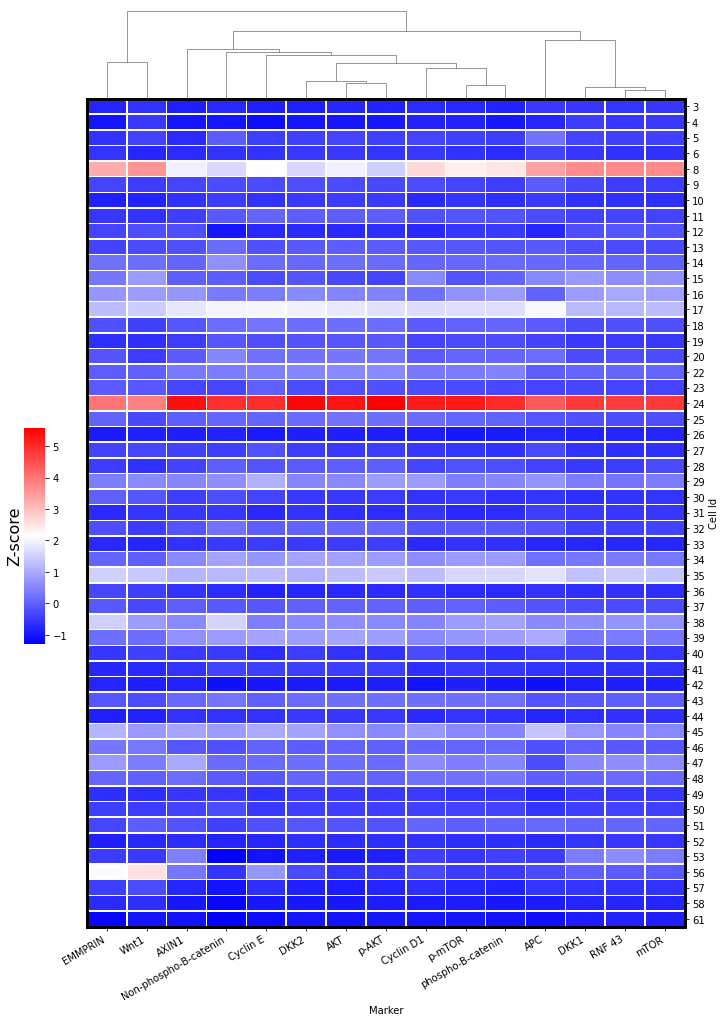

In [347]:
# Heatmap combined
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_per_cell_scaled,
                 cbar_kws={'fraction': 0.01},
                 cmap=my_cmap,
                 linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
ax.set_xlabel('Marker and location')
ax.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

# Clustermap nuclei
ax = sns.clustermap(df_per_cell_scaled['Nuclei'],
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    linewidth=0.5,
                    row_cluster=False,
                    dendrogram_ratio=(.1, .1),
                    cbar_pos=(.02, .4, .03, .2),
                    figsize=(10, 15))
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16, labelpad=-60)

for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

# Clustermap cyto    
ax = sns.clustermap(df_per_cell_scaled['Cyto'],
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    linewidth=0.5,
                    row_cluster=False,
                    dendrogram_ratio=(.1, .1),
                    cbar_pos=(.02, .4, .03, .2),
                    figsize=(10, 15))
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16, labelpad=-60)

for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

## All FOV

In [342]:
df_per_cell_scaled = get_data_per_condition(df_intensity, scaler)
df_per_cell_scaled.head()

Nuclei                                                              \
Marker       AKT       APC     AXIN1 Cyclin D1  Cyclin E      DKK1      DKK2   
Id                                                                             
1_10   -0.257162  0.589192 -0.008329 -0.117028  0.835915 -0.035432  0.057398   
1_11   -0.385900  0.883427  0.132324  0.002688  0.591949  0.750905  0.359904   
1_12    0.593773  1.333805  0.449123  0.677313  0.849183  0.913665  0.652776   
1_13    0.318752  0.921969 -0.019150  0.039416  0.300423  0.181414  0.118322   
1_14   -0.980836 -0.733095 -1.109349 -0.967947 -0.924383 -1.170841 -0.968696   

                                                  ...      Cyto            \
Marker   EMMPRIN Non-phospho-B-catenin    RNF 43  ...      DKK1      DKK2   
Id                                                ...                       
1_10    2.276049              0.256838 -0.471724  ...  0.097010  0.780670   
1_11   -0.031780              0.638023  0.661929  ... -0.515282 -0.660095   
1_12    1.040248              1.085098  0.714188  ... -0.301600  0.227203   
1_13    0.417850              0.336261 -0.051681  ... -0.652176 -0.267239   
1_14   -0.852068             -1.037677 -1.348942  ... -0.796339 -0.275267   

                                                                      \
Marker   EMMPRIN Non-phospho-B-catenin    RNF 43      Wnt1      mTOR   
Id                                                                     
1_10    0.617542              0.842375 -0.026516  0.188753 -0.078109   
1_11   -0.548830             -0.855714 -0.501556 -0.647803 -0.562634   
1_12    0.243851              0.315300 -0.369406  0.114889 -0.455790   
1_13   -0.530817             -0.435330 -0.750254 -0.137838 -0.797911   
1_14   -0.601297             -0.348437 -0.826463 -0.464339 -0.878909   

                                              
Marker     p-AKT    p-mTOR phospho-B-catenin  
Id                                            
1_10    0.306081  0.195268          0.064275  
1_11   -0.792308 -0.779482         -0.734236  
1_12   -0.042884 -0.202280         -0.165249  
1_13   -0.403642 -0.489636         -0.588492  
1_14   -0.429675 -0.643066         -0.648896  

[5 rows x 30 columns]

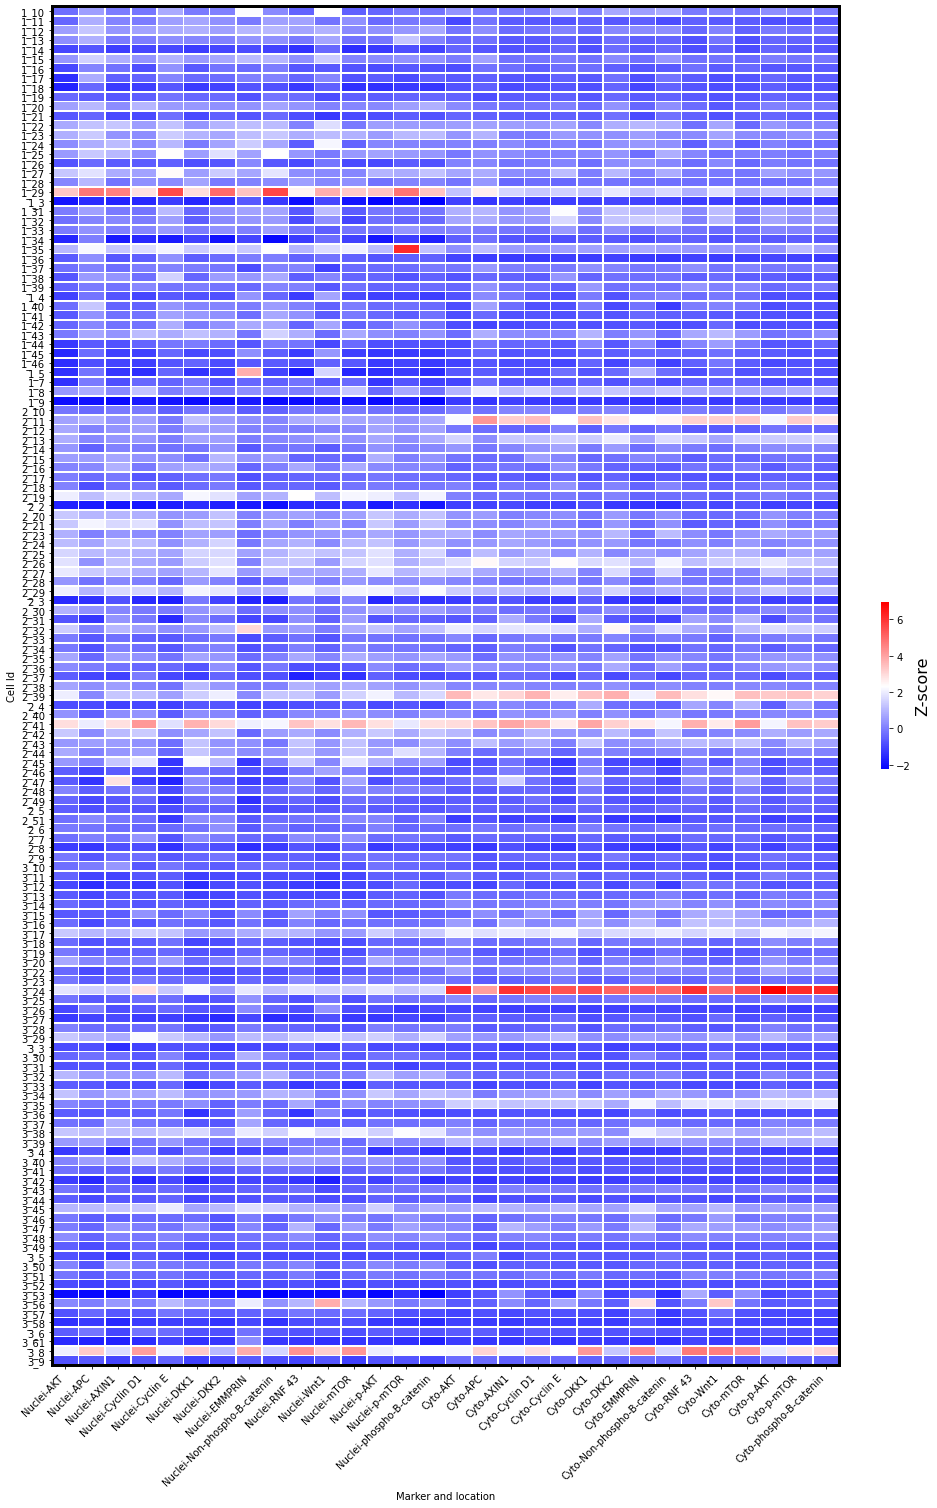

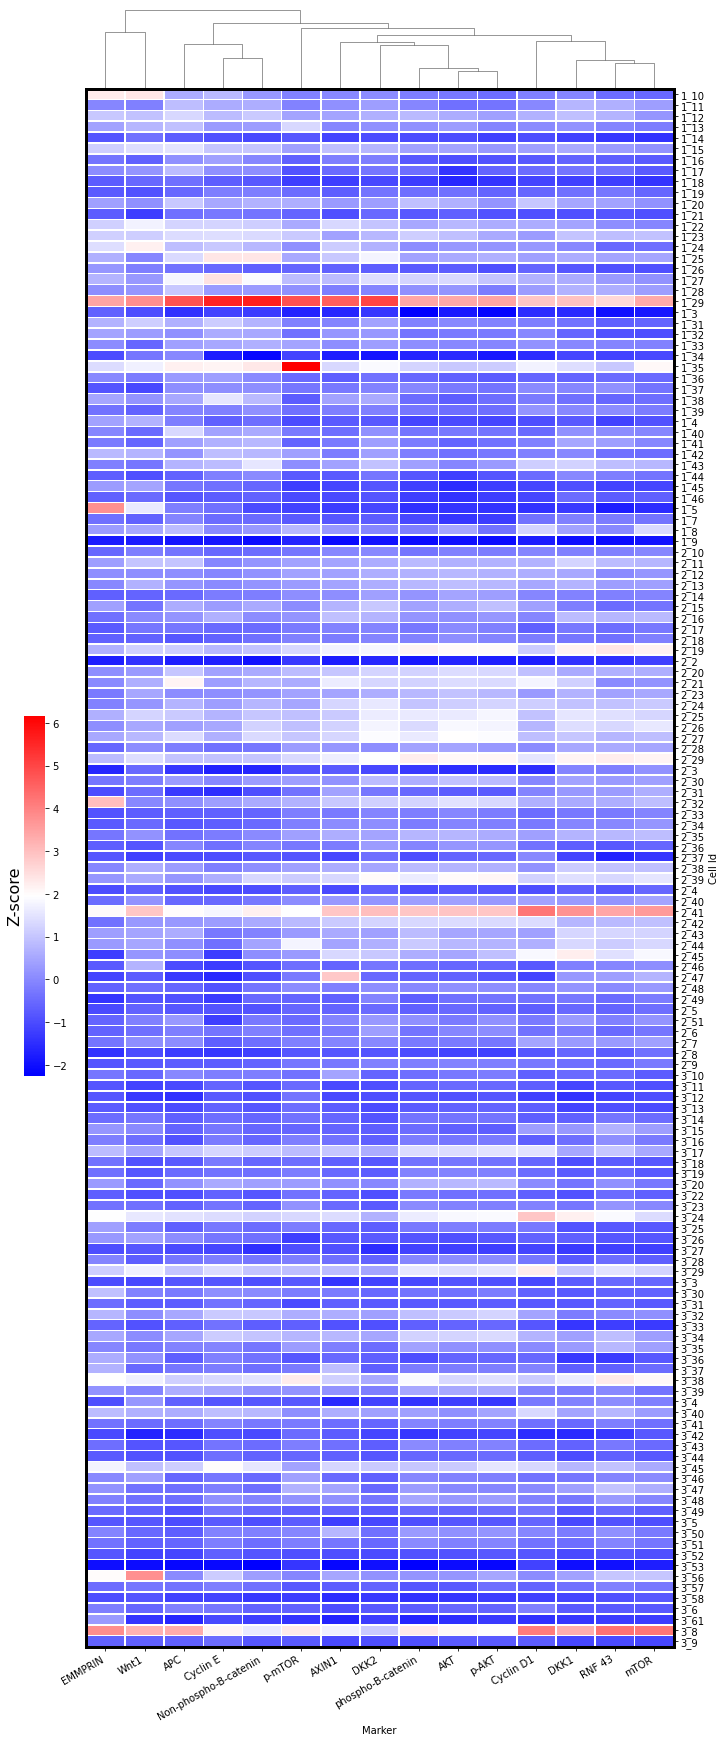

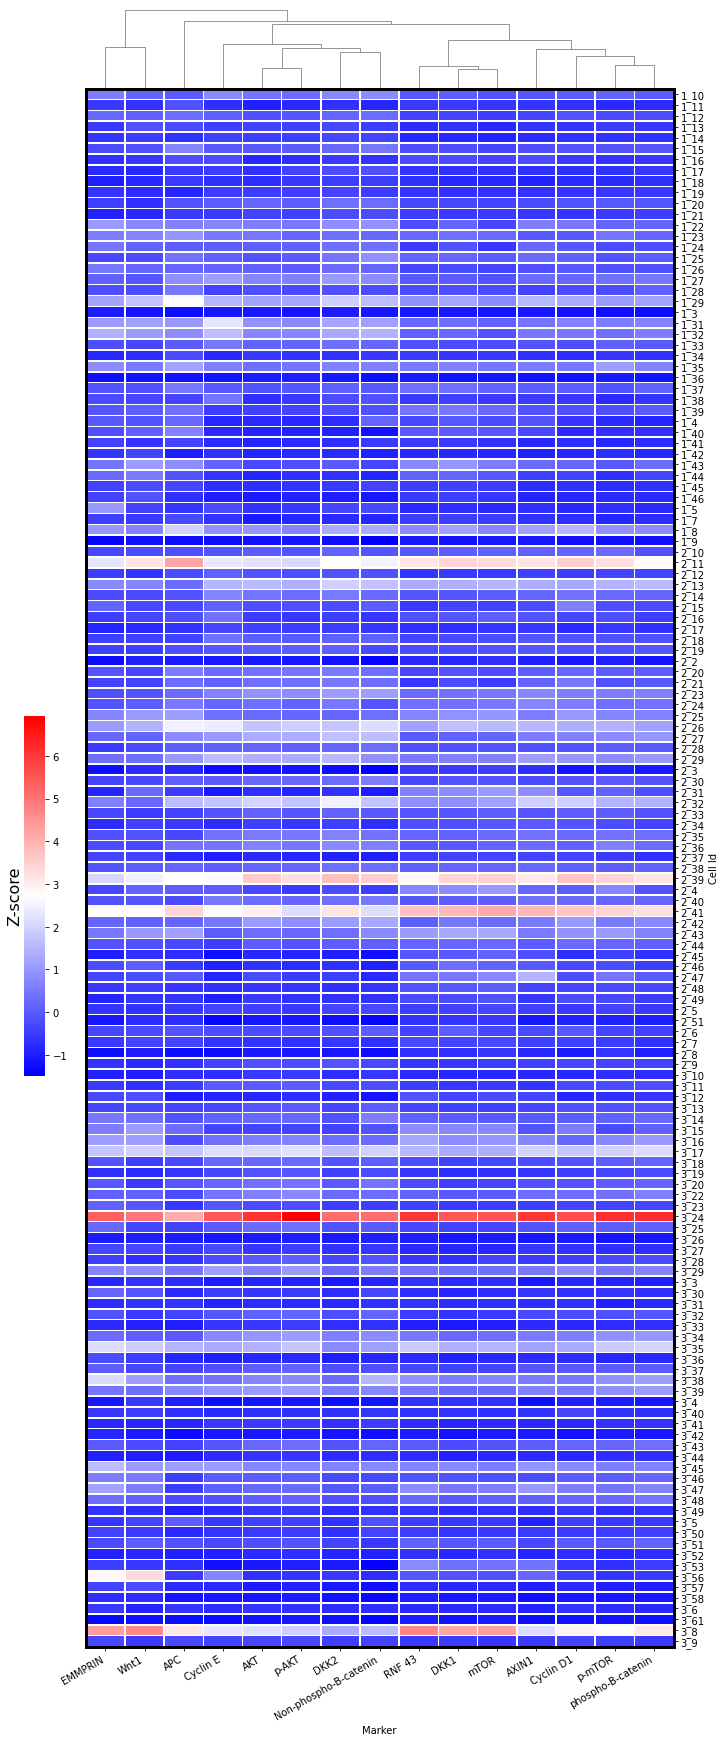

In [343]:
# Heatmap combined
fig, ax = plt.subplots(figsize=(15, 25))
ax = sns.heatmap(df_per_cell_scaled,
                 cbar_kws={'fraction': 0.01},
                 cmap=my_cmap,
                 linewidth=0.5,
                 yticklabels=True,
                 ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,
                   horizontalalignment='right')
ax.set_xlabel('Marker and location')
ax.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.collections[0].colorbar
cbar.set_label(scale_name, fontsize=16)

for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

# Clustermap nuclei
ax = sns.clustermap(df_per_cell_scaled['Nuclei'],
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    linewidth=0.5,
                    row_cluster=False,
                    dendrogram_ratio=(.1, .05),
                    cbar_pos=(.02, .4, .03, .2),
                    yticklabels=True,
                    figsize=(10, 25))
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16, labelpad=-60)

# Clustermap cyto
for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)

ax = sns.clustermap(df_per_cell_scaled['Cyto'],
                    cbar_kws={'fraction': 0.01},
                    cmap=my_cmap,
                    linewidth=0.5,
                    row_cluster=False,
                    dendrogram_ratio=(.1, .05),
                    cbar_pos=(.02, .4, .03, .2),
                    yticklabels=True,
                    figsize=(10, 25))
ax.ax_heatmap.set_xticklabels(
ax.ax_heatmap.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.ax_heatmap.set_xlabel('Marker')
ax.ax_heatmap.set_ylabel('Cell Id')

# Change colorbar label position
cbar = ax.ax_heatmap.collections[0].colorbar
cbar.set_label(scale_name, fontsize= 16, labelpad=-60)

for _, spine in ax.ax_heatmap.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(3)